In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
movie_titles = pd.read_csv(r"/content/movie_titles.csv", encoding='ISO-8859-1',on_bad_lines='skip',header=None)
movie_titles

,0,1,2
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [55]:
#naming the columns
movie_titles.columns = ['Movie_Id','Date_of_release', 'Movie_name']
movie_titles

,Movie_Id,Date_of_release,Movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [56]:
# Date is integer and need to be casted to datetime
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie_Id         17434 non-null  int64  
 1   Date_of_release  17427 non-null  float64
 2   Movie_name       17434 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


In [57]:
#casted the date to date time and then extracted only the year (kind of usless could have casted to string from the begining)
movie_titles['Date_of_release'] = pd.to_datetime(movie_titles['Date_of_release'], format='%Y')
movie_titles['Year_of_release'] = movie_titles['Date_of_release'].dt.strftime('%Y')
#dropped the first date column
movie_titles.drop(['Date_of_release'], axis='columns', inplace=True)
print(movie_titles.info())
movie_titles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie_Id         17434 non-null  int64 
 1   Movie_name       17434 non-null  object
 2   Year_of_release  17427 non-null  object
dtypes: int64(1), object(2)
memory usage: 408.7+ KB
None


,Movie_Id,Movie_name,Year_of_release
0,1,Dinosaur Planet,2003
1,2,Isle of Man TT 2004 Review,2004
2,3,Character,1997
3,4,Paula Abdul's Get Up & Dance,1994
4,5,The Rise and Fall of ECW,2004
...,...,...,...
17429,17766,Where the Wild Things Are and Other Maurice Se...,2002
17430,17767,Fidel Castro: American Experience,2004
17431,17768,Epoch,2000
17432,17769,The Company,2003


In [58]:
#reading the data but leaving only one because it's huge
df= pd.read_csv(r"/content/combined_data_1.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df2= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_2.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df3= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_3.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# df4= pd.read_csv(r"C:\Users\Alaa\Downloads\movies dataset\combined_data_4.txt", header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [59]:
print(df.info())
# print("---------------------------------------------------------------")
# print(df2.info())
# print("---------------------------------------------------------------")
# print(df3.info())
# print("---------------------------------------------------------------")
# print(df4.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611524 entries, 0 to 611523
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cust_Id  611524 non-null  object 
 1   Rating   611349 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.3+ MB
None


In [60]:
#here i merged the data but commented it because it's very big
# df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
611519,1973791,3.0
611520,1922607,5.0
611521,1118320,4.0
611522,139220,5.0


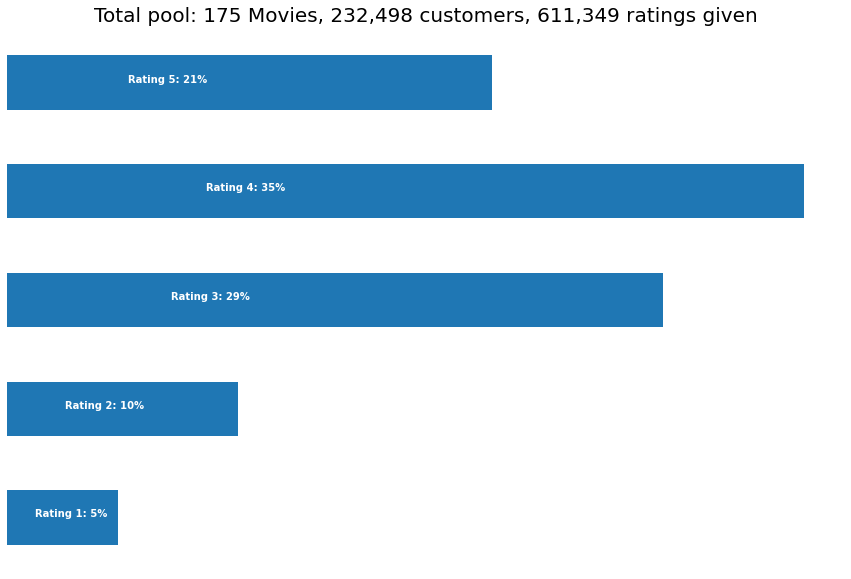

In [61]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


In [62]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [  1.   1.   1. ... 175. 175. 175.]
Length: 611349


In [63]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
df

<ipython-input-63-61104e76eb64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


<ipython-input-63-61104e76eb64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
611519,1973791,3.0,175
611520,1922607,5.0,175
611521,1118320,4.0,175
611522,139220,5.0,175


In [64]:
# here i merged the movie titles with the combined data 1 to map the ids of the movies to their names
merged_df = pd.merge(df, movie_titles, on='Movie_Id', how='left')
#dropped the ids and date because there was no longer use of them
merged_df = merged_df.drop(['Movie_Id','Year_of_release'], axis=1)
merged_df

,Cust_Id,Rating,Movie_name
0,1488844,3.0,Dinosaur Planet
1,822109,5.0,Dinosaur Planet
2,885013,4.0,Dinosaur Planet
3,30878,4.0,Dinosaur Planet
4,823519,3.0,Dinosaur Planet
...,...,...,...
611344,1973791,3.0,Reservoir Dogs
611345,1922607,5.0,Reservoir Dogs
611346,1118320,4.0,Reservoir Dogs
611347,139220,5.0,Reservoir Dogs


In [65]:
#here i dropped all the rows containing rate less than 3 because less than 3 is a bad rate so that movie shouldn't be recommended
high_ratings = merged_df.drop(merged_df[merged_df['Rating'] < 3].index)

high_ratings

,Cust_Id,Rating,Movie_name
0,1488844,3.0,Dinosaur Planet
1,822109,5.0,Dinosaur Planet
2,885013,4.0,Dinosaur Planet
3,30878,4.0,Dinosaur Planet
4,823519,3.0,Dinosaur Planet
...,...,...,...
611344,1973791,3.0,Reservoir Dogs
611345,1922607,5.0,Reservoir Dogs
611346,1118320,4.0,Reservoir Dogs
611347,139220,5.0,Reservoir Dogs


In [66]:
#groubed the movies by customer in the form of a list so that the data would be like transacions(customer id and the movies they saw like market basket analysis)
df_grouped = high_ratings.groupby('Cust_Id')['Movie_name'].apply(list).reset_index()

df_grouped

,Cust_Id,Movie_name
0,6,"[Something's Gotta Give, Laird: White Knuckle ..."
1,7,"[What the #$*! Do We Know!?, Lilo and Stitch, ..."
2,42,[Something's Gotta Give]
3,79,"[Something's Gotta Give, The Powerpuff Girls M..."
4,87,"[The Chorus, Reservoir Dogs]"
...,...,...
218029,2649388,"[Something's Gotta Give, Mostly Martha]"
218030,2649401,"[The Game, Sweet November]"
218031,2649404,[Jingle All the Way]
218032,2649426,"[7 Seconds, Lilo and Stitch, Something's Gotta..."


In [67]:
#this code was for the ids before so i casted it to string so it won't be removed with the square brackets
#I removed the square brackets and splited the movies and expanded them to separated columns
df_grouped['Movie_name']= df_grouped['Movie_name'].astype(str)
df_grouped['Movie_name'] = df_grouped['Movie_name'].str.strip('[]')
movies = df_grouped['Movie_name'].str.split(',', expand=True)
movies

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,"""Something's Gotta Give""",'Laird: White Knuckle Extreme',"""The Devil's Brigade""",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,'The Chorus','Reservoir Dogs',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218029,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
218030,'The Game','Sweet November',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
218031,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
218032,'7 Seconds','Lilo and Stitch',"""Something's Gotta Give""",'Duplex (Widescreen)',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [68]:
# I re-added the customer Id column because it was removed in the las step
movies['Cust_Id']=df_grouped['Cust_Id']
movies

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,Cust_Id
0,"""Something's Gotta Give""",'Laird: White Knuckle Extreme',"""The Devil's Brigade""",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,6
1,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,7
2,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,42
3,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,79
4,'The Chorus','Reservoir Dogs',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218029,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649388
218030,'The Game','Sweet November',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649401
218031,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649404
218032,'7 Seconds','Lilo and Stitch',"""Something's Gotta Give""",'Duplex (Widescreen)',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2649426


In [69]:
#then made it the index of the dataset
movies = movies.set_index('Cust_Id')
movies

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,"""Something's Gotta Give""",'Laird: White Knuckle Extreme',"""The Devil's Brigade""",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
42,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
79,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
87,'The Chorus','Reservoir Dogs',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649388,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649401,'The Game','Sweet November',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649404,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [70]:
#seeing the number of nan values in each column to decide which columns to drop
for column in movies:
  print(column,movies[column].isnull().sum())

0 0
1 102930
2 151511
3 177656
4 192510
5 201508
6 207054
7 210626
8 212978
9 214505
10 215519
11 216226
12 216718
13 217067
14 217310
15 217493
16 217600
17 217685
18 217752
19 217810
20 217846
21 217877
22 217905
23 217930
24 217948
25 217960
26 217966
27 217979
28 217985
29 217991
30 217996
31 217999
32 218004
33 218009
34 218010
35 218013
36 218015
37 218015
38 218019
39 218021
40 218021
41 218022
42 218023
43 218024
44 218024
45 218025
46 218027
47 218027
48 218027
49 218028
50 218028
51 218028
52 218028
53 218028
54 218029
55 218029
56 218029
57 218031
58 218031
59 218031
60 218031
61 218032
62 218032
63 218032
64 218032
65 218032
66 218032
67 218032
68 218032
69 218032
70 218032
71 218032
72 218032
73 218032
74 218032
75 218032
76 218032
77 218032
78 218032
79 218032
80 218032
81 218032
82 218032
83 218032
84 218032
85 218032
86 218032
87 218032
88 218032
89 218032
90 218032
91 218032
92 218032
93 218032
94 218032
95 218032
96 218032
97 218032
98 218032
99 218032
100 218032
101 

In [71]:
#I removed the columns which had 186000 nulls and above
movies = movies.drop(movies.iloc[:, 16:94],axis = 1)
movies

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,"""Something's Gotta Give""",'Laird: White Knuckle Extreme',"""The Devil's Brigade""",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,'What the #$*! Do We Know!?','Lilo and Stitch',"""Something's Gotta Give""",'Silkwood',None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
42,"""Something's Gotta Give""",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
79,"""Something's Gotta Give""",'The Powerpuff Girls Movie',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
87,'The Chorus','Reservoir Dogs',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649388,"""Something's Gotta Give""",'Mostly Martha',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649401,'The Game','Sweet November',None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2649404,'Jingle All the Way',None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [72]:
!pip install -U mlxtend
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#making a list of list to contain each watched except for the nans
watched = []
for i in range(len(movies)):
    row = []
    for j in range(5):
        if isinstance(movies.iloc[i,j], str):
            row.append(str(movies.iloc[i,j]))
    watched.append(row)
watched

[['"Something\'s Gotta Give"',
  " 'Laird: White Knuckle Extreme'",
  ' "The Devil\'s Brigade"'],
 ["'What the #$*! Do We Know!?'",
  " 'Lilo and Stitch'",
  ' "Something\'s Gotta Give"',
  " 'Silkwood'"],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"', " 'The Powerpuff Girls Movie'"],
 ["'The Chorus'", " 'Reservoir Dogs'"],
 ["'Silkwood'", " 'The Chorus'", " 'Reservoir Dogs'"],
 ['"Something\'s Gotta Give"'],
 ["'Lilo and Stitch'",
  " 'Jade'",
  " 'Dragonheart'",
  " 'Congo'",
  " 'Rambo: First Blood Part II'"],
 ["'Cartoon Network Halloween: 9 Creepy Cartoon Capers'"],
 ["'Reservoir Dogs'"],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"'],
 ['"Something\'s Gotta Give"', " 'Spartan'", " 'Rambo: First Blood Part II'"],
 ["'Duplex (Widescreen)'"],
 ["'The Game'", " 'Reservoir Dogs'"],
 ['"Something\'s Gotta Give"',
  " 'Duplex (Widescreen)'",
  " 'The Game'",
  " 'Reservoir Dogs'"],
 ["'Lilo and Stitch'", ' "Something\'s Gotta Give"', " 'Jingle All the Way

In [74]:
#Converting the transaction data to a one-hot encoded forma
te = TransactionEncoder()
te_ary = te.fit(watched).transform(watched)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [75]:
#dfining a function for frequent items so the user can put his own min support
def frequent_items():
  minSupport= float(input("enter min support"))
  frequent_itemsets = apriori(df, min_support= minSupport, use_colnames=True)
  frequent_itemsets.sort_values(by="support",ascending=False)
  return frequent_itemsets

In [81]:
def Rules(frequent_itemsets):
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
  rules.sort_values(by=["support","confidence"],ascending=False)
  return rules

In [82]:
frequent_itemsets = frequent_items()
frequent_itemsets

enter min support.03


,support,itemsets
0,0.133516,"( ""Something's Gotta Give"")"
1,0.052987,( 'Dragonheart')
2,0.073048,( 'Duplex (Widescreen)')
3,0.030289,( 'Mostly Martha')
4,0.046167,( 'Rambo: First Blood Part II')
5,0.081960,( 'Reservoir Dogs')
6,0.056454,( 'Silkwood')
7,0.046603,( 'Spartan')
8,0.051630,( 'Sweet November')
9,0.104213,( 'The Game')


In [83]:
rules=Rules(frequent_itemsets)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,('Lilo and Stitch'),"( ""Something's Gotta Give"")",0.138226,0.133516,0.065728,0.475513,3.561469,0.047273,1.652059
1,"( ""Something's Gotta Give"")",('Lilo and Stitch'),0.133516,0.138226,0.065728,0.492288,3.561469,0.047273,1.697368
2,( 'Duplex (Widescreen)'),"(""Something's Gotta Give"")",0.073048,0.362719,0.036779,0.503485,1.388086,0.010283,1.283508
3,"(""Something's Gotta Give"")",( 'Duplex (Widescreen)'),0.362719,0.073048,0.036779,0.101397,1.388086,0.010283,1.031548
4,( 'The Game'),"(""Something's Gotta Give"")",0.104213,0.362719,0.041934,0.402385,1.109359,0.004134,1.066375
5,"(""Something's Gotta Give"")",( 'The Game'),0.362719,0.104213,0.041934,0.115610,1.109359,0.004134,1.012886
